Predicting whether the email is spam or not
1. Problem Definition
In a statement, The problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we have to build a system to identify spam emails(either the mail is spam or not).

2. Data
All of the dataset values were provided by a company.

3. Evaluation
Evaluating a models predictions using problem-specific evaluation metrics. Following are the metrics we used to evaluate the performance of ML techniques:

Precision
Precision refers to the closeness of two or more measurements to each other. In Machine Learning, precision is the fraction of relevant instances among the retrieved instances. Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).

Accuracy
Accuracy refers to the closeness of a measured value to a standard or known value. Accuracy = (TP+TN) / ALL

Recall
Recall is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found. Recall = TP / (TP + FN)

F1-Score
F1-scores are a statistical method for determining accuracy accounting for both precision and recall. It is essentially the harmonic mean of precision and recall.

AUC
AUC is the area under the ROC curve. The closer the AUC value is to 1, the better the model.

4. Features
The following are the features we'll use to predict our target variable Is_Response.

Features:

subject :subject of the e-mail.
message :contains the body of the email .
Label:

label: 0 or 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn.model_selection import KFold,cross_val_score

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
mail = pd.read_csv("F:\Priti\data trained\Spam-Project\Spam Project\spam.csv", encoding = 'latin-1')
mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Dataset :
v1: The Label,Spam or Not(ham)
v2: The raw text.
Unnamed: 2 Unnamed: 3 Unnamed: 4 are unwanted columns.

# EDA

In [3]:
mail.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1, inplace = True)

In [4]:
mail.shape

(5572, 2)

In [5]:
mail.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Visualization

<AxesSubplot:xlabel='v1', ylabel='count'>

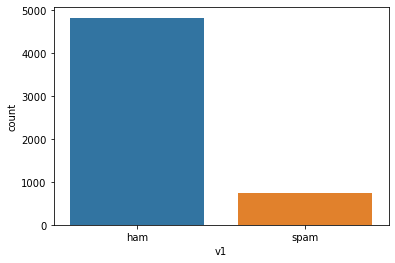

In [7]:
sns.countplot(mail.v1)

In [8]:
mail['v1'].replace('ham',0, inplace = True)
mail['v1'].replace('spam',1, inplace = True)

In [9]:
mail.v1.value_counts()

0    4825
1     747
Name: v1, dtype: int64

# Natural Language Processing (NLP)

# Data Preprocessing

- Converting to lower

In [10]:
mail['v2'] = mail['v2'].str.lower()

- Stop Words

In [11]:
from gensim.parsing.preprocessing import remove_stopwords
import gensim
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS

- Original Length

In [12]:
original = mail['v2'].str.len()

- Email Addresses

In [13]:
mail['v2'] = mail['v2'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')

- Website

In [14]:
mail['v2'] = mail['v2'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','website')

- Phone Number

In [15]:
mail['v2'] = mail['v2'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

- Currency

In [16]:
mail['v2'] = mail['v2'].str.replace(r'£|\$', 'dollers')

- Numbers

In [17]:
mail['v2'] = mail['v2'].str.replace(r'\d+(\.\d+)?', 'number')

- Dealing with Punctuation

In [18]:
mail['v2'] = mail['v2'].apply(lambda x: ' '.join(term for term in x.split() 
                                                                                 if term not in string.punctuation))

- Cleaned Length

In [20]:
clean = mail.v2.str.len()

In [21]:
print ('Origian Length :', original.sum())
print ('Clean Length :', clean.sum())

Origian Length : 446422
Clean Length : 459289


# WordCloud

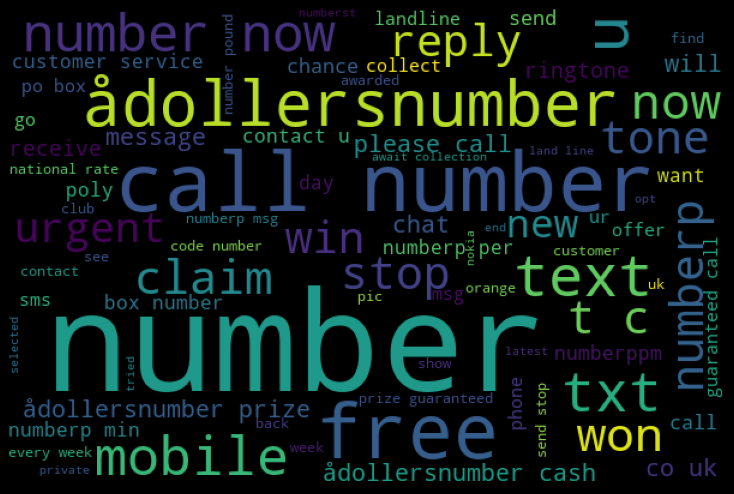

In [22]:
hams = mail['v2'][mail['v1']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=80).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Final Dataset

In [23]:
mail

,v1,v2
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in number a wkly comp to win fa cup...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the numbernd time we have tried number...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, was in mood for that. so...any other sug..."
5570,0,the guy did some bitching but i acted like i'd...


# Encoding
TF-IDF Vectorization

In [24]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(mail['v2'])
x = features

In [25]:
y = mail.v1

# Model Building
- Train Test Split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 90)

- Function for Training & Testing

In [27]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))
        print('\n ----- Roc Curve ----- \n')
        plot_roc_curve(clas, x_test, y_test) 

- Model Instantiating

In [28]:
ada = AdaBoostClassifier()
gbr = GradientBoostingClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
navie = GaussianNB()

- AdaBoost Classifier.


 ----- Train Result ----- 

Accuracy Score: 0.9885139985642498

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3613
           1       0.99      0.93      0.96       566

    accuracy                           0.99      4179
   macro avg       0.99      0.96      0.97      4179
weighted avg       0.99      0.99      0.99      4179


 ----- Confusion matrix ----- 
 [[3605    8]
 [  40  526]]

 ----- Test Result ----- 

Accuracy Score: 0.9791816223977028

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1212
           1       0.96      0.87      0.92       181

    accuracy                           0.98      1393
   macro avg       0.97      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393


 ----- Confusion matrix ----- 
 [[1206    6]
 [  23  158]]

 ----- Roc Curve -----

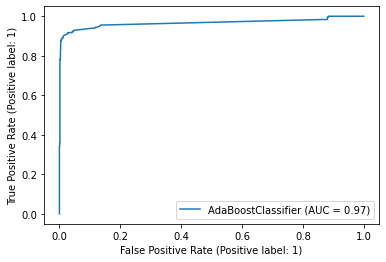

In [29]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

- GradientBoosting Classifier


 ----- Train Result ----- 

Accuracy Score: 0.9882747068676717

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3613
           1       1.00      0.91      0.95       566

    accuracy                           0.99      4179
   macro avg       0.99      0.96      0.97      4179
weighted avg       0.99      0.99      0.99      4179


 ----- Confusion matrix ----- 
 [[3613    0]
 [  49  517]]

 ----- Test Result ----- 

Accuracy Score: 0.9791816223977028

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1212
           1       0.99      0.85      0.91       181

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393


 ----- Confusion matrix ----- 
 [[1211    1]
 [  28  153]]

 ----- Roc Curve -----

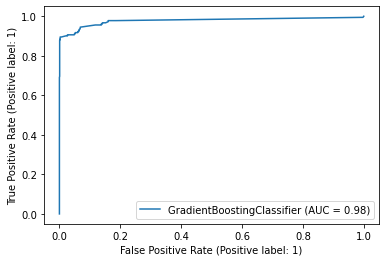

In [30]:
gbr.fit(x_train,y_train)
score(gbr, x_train,x_test,y_train,y_test,train = True)
score(gbr, x_train,x_test,y_train,y_test,train = False)

- KNeighborsClassifier


 ----- Train Result ----- 

Accuracy Score: 0.9270160325436707

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      3613
           1       1.00      0.46      0.63       566

    accuracy                           0.93      4179
   macro avg       0.96      0.73      0.80      4179
weighted avg       0.93      0.93      0.92      4179


 ----- Confusion matrix ----- 
 [[3613    0]
 [ 305  261]]

 ----- Test Result ----- 

Accuracy Score: 0.9152907394113424

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1212
           1       1.00      0.35      0.52       181

    accuracy                           0.92      1393
   macro avg       0.96      0.67      0.73      1393
weighted avg       0.92      0.92      0.90      1393


 ----- Confusion matrix ----- 
 [[1212    0]
 [ 118   63]]

 ----- Roc Curve -----

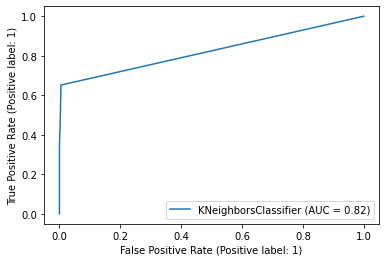

In [31]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

- RandomForest Classifier


 ----- Train Result ----- 

Accuracy Score: 0.9997607083034219

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3613
           1       1.00      1.00      1.00       566

    accuracy                           1.00      4179
   macro avg       1.00      1.00      1.00      4179
weighted avg       1.00      1.00      1.00      4179


 ----- Confusion matrix ----- 
 [[3612    1]
 [   0  566]]

 ----- Test Result ----- 

Accuracy Score: 0.9827709978463748

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1212
           1       1.00      0.87      0.93       181

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393


 ----- Confusion matrix ----- 
 [[1212    0]
 [  24  157]]

 ----- Roc Curve -----

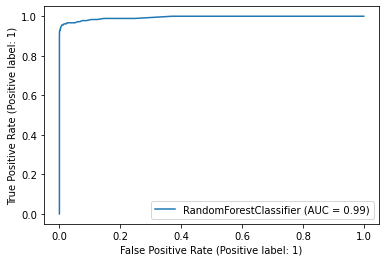

In [32]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

- Logistic Regression


 ----- Train Result ----- 

Accuracy Score: 0.9767887054319215

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3613
           1       0.97      0.85      0.91       566

    accuracy                           0.98      4179
   macro avg       0.98      0.92      0.95      4179
weighted avg       0.98      0.98      0.98      4179


 ----- Confusion matrix ----- 
 [[3600   13]
 [  84  482]]

 ----- Test Result ----- 

Accuracy Score: 0.9698492462311558

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1212
           1       0.99      0.78      0.87       181

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393


 ----- Confusion matrix ----- 
 [[1210    2]
 [  40  141]]

 ----- Roc Curve -----

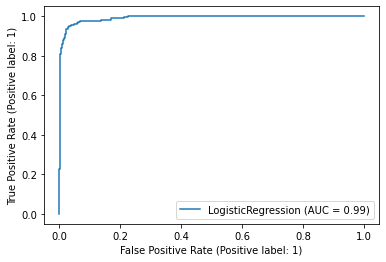

In [33]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

- Naive Bayes (GaussianNB)

In [34]:
cv = CountVectorizer(max_features = 1500) 

In [35]:
X = cv.fit_transform(mail['v2']).toarray()
Y = mail.iloc[:, 1].values

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [37]:
def score_navie(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))

In [39]:
navie.fit(X_train,Y_train)
score_navie(navie, X_train,X_test,Y_train,Y_test,train = True)
score_navie(navie, X_train,X_test,Y_train,Y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9834888729361091

 ----- Test Result ----- 

Accuracy Score: 0.11198851399856424


# RandomForest Classifier is giving the best result as compared to other.

Original vs Predicted

In [40]:
a_rfc = np.array(y_test)
predicted_rfc = np.array(rf.predict(x_test))
df_rfc = pd.DataFrame({'Original':a_rfc,'Predicted':predicted_rfc})
df_rfc

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1388,0,0
1389,0,0
1390,0,0
1391,0,0


# Cross Validation

In [41]:
k_f = KFold(n_splits = 3,shuffle = True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [42]:
cross_val_score(rf,x,y,cv = 3).mean()

0.9804377737317598

Model is not over-fitting, Model is working fine.

# Hyperparameter Tunning

In [43]:
param = {'n_estimators':range(0,100,10),
         'ccp_alpha':[0.0,0.2,0.4,0.5,0.7,0.8,1.0]
         }

In [46]:
grid = GridSearchCV(rf,param_grid = param)

In [47]:
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'ccp_alpha': 0.0, 'n_estimators': 90}


In [49]:
rf_hyp = RandomForestClassifier(ccp_alpha = 0.0, n_estimators = 90)


 ----- Train Result ----- 

Accuracy Score: 0.9997607083034219

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3613
           1       1.00      1.00      1.00       566

    accuracy                           1.00      4179
   macro avg       1.00      1.00      1.00      4179
weighted avg       1.00      1.00      1.00      4179


 ----- Confusion matrix ----- 
 [[3612    1]
 [   0  566]]

 ----- Test Result ----- 

Accuracy Score: 0.9842067480258435

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1212
           1       1.00      0.88      0.94       181

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393


 ----- Confusion matrix ----- 
 [[1212    0]
 [  22  159]]

 ----- Roc Curve -----

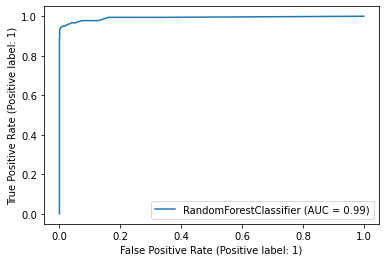

In [50]:
rf_hyp.fit(x_train,y_train)
score(rf_hyp, x_train,x_test,y_train,y_test,train = True)
score(rf_hyp, x_train,x_test,y_train,y_test,train = False)

Post Tunning results & Pre Tunning results are almost same.

# Saving the model

In [51]:
filename = 'Email_spam.pickle'
pickle.dump(rf, open(filename, 'wb'))